In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        
from sklearn.datasets import make_blobs
import math
import scipy as sp


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [3]:
cluster=pd.read_csv('VitalSign_Sample.csv',encoding='ANSI')

In [4]:
cluster['fm']=cluster['성별'].map({'M':1,'F':0})

In [5]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      700 non-null    object
 1   키       700 non-null    int64 
 2   몸무게     700 non-null    int64 
 3   fm      700 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 22.0+ KB


In [6]:
cluster=cluster[(cluster['키']>=130)&(cluster['몸무게']>=5)&(cluster['몸무게']<=140)] 

In [7]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      665 non-null    object
 1   키       665 non-null    int64 
 2   몸무게     665 non-null    int64 
 3   fm      665 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.0+ KB


In [8]:
cluster=cluster.astype({'fm':'object'})

In [9]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      665 non-null    object
 1   키       665 non-null    int64 
 2   몸무게     665 non-null    int64 
 3   fm      665 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.0+ KB


In [10]:
cluster_f=cluster[['키','몸무게','fm']]

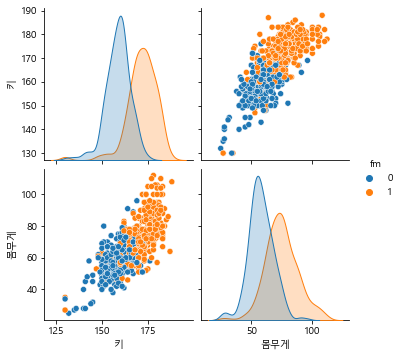

In [11]:
sns.pairplot(cluster_f,hue='fm')

In [12]:
from sklearn.cluster import KMeans

In [13]:
ks=range(1,10)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(cluster_f)
    inertias.append(model.inertia_)

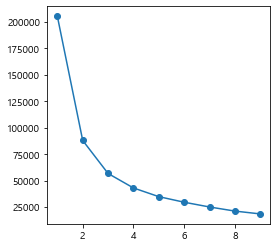

In [14]:
plt.figure(figsize=(4,4))

plt.plot(ks,inertias,'-o')
plt.show()

In [15]:
clust_model=KMeans(n_clusters=2)
clust_model.fit(cluster_f)

centers=clust_model.cluster_centers_
pred=clust_model.predict(cluster_f)

print(pd.DataFrame(centers))
print(pred[:10])

            0          1         2
0  159.105263  56.234211  0.221053
1  173.000000  79.189474  0.856140
[1 1 0 0 0 0 0 0 1 0]


In [16]:
clust_df=cluster_f.copy()
clust_df['clust']=pred
clust_df.to_json()

'{"\\ud0a4":{"0":175,"1":174,"2":168,"3":130,"4":160,"5":156,"6":160,"7":156,"8":176,"9":166,"10":176,"11":177,"12":154,"13":172,"14":150,"15":161,"16":170,"18":177,"19":160,"20":178,"21":150,"22":176,"23":168,"24":175,"25":165,"26":160,"27":153,"28":164,"30":153,"31":169,"32":158,"33":180,"34":170,"35":160,"36":168,"37":157,"38":173,"39":170,"40":168,"41":151,"42":153,"43":167,"44":156,"45":162,"46":180,"47":154,"48":168,"49":175,"50":156,"51":182,"52":169,"53":174,"54":160,"55":173,"56":182,"57":152,"58":152,"59":164,"60":163,"61":165,"62":174,"63":172,"64":168,"66":160,"67":156,"68":170,"69":168,"70":157,"71":170,"72":167,"73":167,"74":157,"75":177,"76":160,"77":165,"78":173,"79":150,"80":183,"81":158,"82":175,"83":176,"84":154,"85":167,"86":152,"87":164,"88":164,"89":169,"90":160,"91":165,"92":158,"93":158,"94":158,"95":177,"96":135,"97":159,"99":173,"100":173,"101":173,"102":156,"104":156,"105":182,"106":173,"107":158,"108":149,"109":164,"110":152,"111":173,"112":160,"113":157,"11

In [17]:
clust_df.columns = ['x', 'y', 'z','clust']

<AxesSubplot:xlabel='x', ylabel='y'>

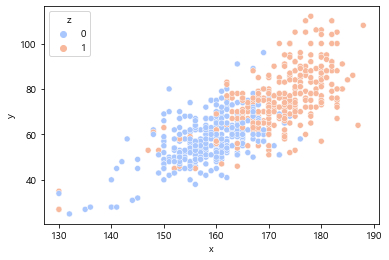

In [19]:
#원본데이터 시각화
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=clust_df,hue='z',palette='coolwarm')

<AxesSubplot:xlabel='x', ylabel='y'>

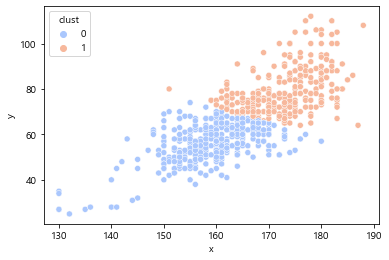

In [21]:
#kmeans예측 군집화 시각화
sns.scatterplot(x=clust_df.iloc[:,0],y=clust_df.iloc[:,1],data=clust_df,hue='clust',palette='coolwarm')

In [23]:
pd.crosstab(clust_df['z'],clust_df['clust'])

clust,0,1
z,,
0,295,42
1,84,244


In [29]:
clust_df

,x,y,z,clust
0,175,75,1,1
1,174,68,0,1
2,168,65,0,0
3,130,27,1,0
4,160,55,0,0
5,156,55,0,0
6,160,53,0,0
7,156,67,0,0
8,176,83,1,1
9,166,67,1,0


In [24]:
clust_df.to_dict()

{'x': {0: 175,
  1: 174,
  2: 168,
  3: 130,
  4: 160,
  5: 156,
  6: 160,
  7: 156,
  8: 176,
  9: 166,
  10: 176,
  11: 177,
  12: 154,
  13: 172,
  14: 150,
  15: 161,
  16: 170,
  18: 177,
  19: 160,
  20: 178,
  21: 150,
  22: 176,
  23: 168,
  24: 175,
  25: 165,
  26: 160,
  27: 153,
  28: 164,
  30: 153,
  31: 169,
  32: 158,
  33: 180,
  34: 170,
  35: 160,
  36: 168,
  37: 157,
  38: 173,
  39: 170,
  40: 168,
  41: 151,
  42: 153,
  43: 167,
  44: 156,
  45: 162,
  46: 180,
  47: 154,
  48: 168,
  49: 175,
  50: 156,
  51: 182,
  52: 169,
  53: 174,
  54: 160,
  55: 173,
  56: 182,
  57: 152,
  58: 152,
  59: 164,
  60: 163,
  61: 165,
  62: 174,
  63: 172,
  64: 168,
  66: 160,
  67: 156,
  68: 170,
  69: 168,
  70: 157,
  71: 170,
  72: 167,
  73: 167,
  74: 157,
  75: 177,
  76: 160,
  77: 165,
  78: 173,
  79: 150,
  80: 183,
  81: 158,
  82: 175,
  83: 176,
  84: 154,
  85: 167,
  86: 152,
  87: 164,
  88: 164,
  89: 169,
  90: 160,
  91: 165,
  92: 158,
  93: 158,
  94

In [25]:
clust_df.to_dict('records')

[{'x': 175, 'y': 75, 'z': 1, 'clust': 1},
 {'x': 174, 'y': 68, 'z': 0, 'clust': 1},
 {'x': 168, 'y': 65, 'z': 0, 'clust': 0},
 {'x': 130, 'y': 27, 'z': 1, 'clust': 0},
 {'x': 160, 'y': 55, 'z': 0, 'clust': 0},
 {'x': 156, 'y': 55, 'z': 0, 'clust': 0},
 {'x': 160, 'y': 53, 'z': 0, 'clust': 0},
 {'x': 156, 'y': 67, 'z': 0, 'clust': 0},
 {'x': 176, 'y': 83, 'z': 1, 'clust': 1},
 {'x': 166, 'y': 67, 'z': 1, 'clust': 0},
 {'x': 176, 'y': 78, 'z': 1, 'clust': 1},
 {'x': 177, 'y': 87, 'z': 1, 'clust': 1},
 {'x': 154, 'y': 58, 'z': 1, 'clust': 0},
 {'x': 172, 'y': 67, 'z': 1, 'clust': 1},
 {'x': 150, 'y': 55, 'z': 0, 'clust': 0},
 {'x': 161, 'y': 56, 'z': 0, 'clust': 0},
 {'x': 170, 'y': 80, 'z': 1, 'clust': 1},
 {'x': 177, 'y': 76, 'z': 1, 'clust': 1},
 {'x': 160, 'y': 45, 'z': 0, 'clust': 0},
 {'x': 178, 'y': 83, 'z': 1, 'clust': 1},
 {'x': 150, 'y': 48, 'z': 0, 'clust': 0},
 {'x': 176, 'y': 85, 'z': 1, 'clust': 1},
 {'x': 168, 'y': 64, 'z': 0, 'clust': 0},
 {'x': 175, 'y': 105, 'z': 1, 'clu

In [26]:
clust_df.to_dict('index')

{0: {'x': 175, 'y': 75, 'z': 1, 'clust': 1},
 1: {'x': 174, 'y': 68, 'z': 0, 'clust': 1},
 2: {'x': 168, 'y': 65, 'z': 0, 'clust': 0},
 3: {'x': 130, 'y': 27, 'z': 1, 'clust': 0},
 4: {'x': 160, 'y': 55, 'z': 0, 'clust': 0},
 5: {'x': 156, 'y': 55, 'z': 0, 'clust': 0},
 6: {'x': 160, 'y': 53, 'z': 0, 'clust': 0},
 7: {'x': 156, 'y': 67, 'z': 0, 'clust': 0},
 8: {'x': 176, 'y': 83, 'z': 1, 'clust': 1},
 9: {'x': 166, 'y': 67, 'z': 1, 'clust': 0},
 10: {'x': 176, 'y': 78, 'z': 1, 'clust': 1},
 11: {'x': 177, 'y': 87, 'z': 1, 'clust': 1},
 12: {'x': 154, 'y': 58, 'z': 1, 'clust': 0},
 13: {'x': 172, 'y': 67, 'z': 1, 'clust': 1},
 14: {'x': 150, 'y': 55, 'z': 0, 'clust': 0},
 15: {'x': 161, 'y': 56, 'z': 0, 'clust': 0},
 16: {'x': 170, 'y': 80, 'z': 1, 'clust': 1},
 18: {'x': 177, 'y': 76, 'z': 1, 'clust': 1},
 19: {'x': 160, 'y': 45, 'z': 0, 'clust': 0},
 20: {'x': 178, 'y': 83, 'z': 1, 'clust': 1},
 21: {'x': 150, 'y': 48, 'z': 0, 'clust': 0},
 22: {'x': 176, 'y': 85, 'z': 1, 'clust': 1}